In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Brute force with ORB descriptors

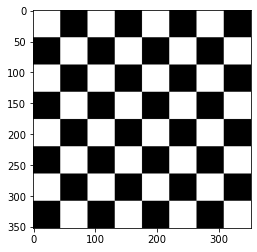

In [2]:
chess = cv2.imread('data/flat_chessboard.png', 0)
plt.imshow(chess, cmap='gray')

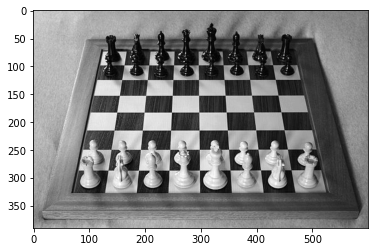

In [3]:
real_chess = cv2.imread('data/real_chessboard.jpg', 0)
plt.imshow(real_chess, cmap='gray')

In [4]:
orb = cv2.ORB_create()

In [5]:
keypoint1, descrip1 = orb.detectAndCompute(chess, None)
keypoint2, descrip2 = orb.detectAndCompute(real_chess, None)

In [6]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [7]:
matches = bf.match(descrip1, descrip2)

In [8]:
matches = sorted(matches, key=lambda x: x.distance)

In [9]:
chess_matches = cv2.drawMatches(chess, keypoint1, real_chess, 
                                keypoint2, matches[:25], None, flags=2)

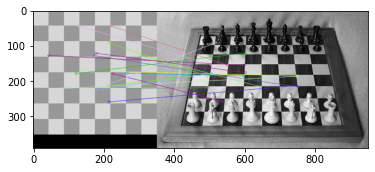

In [10]:
plt.imshow(chess_matches)

# Brute force with SIFT descriptors and Ratio Test

In [23]:
sift = cv2.xfeatures2d.SIFT_create()

In [24]:
keypoint1, descrip1 = sift.detectAndCompute(chess, None)
keypoint2, descrip2 = sift.detectAndCompute(real_chess, None)

In [25]:
bf = cv2.BFMatcher()

In [38]:
matches = bf.knnMatch(descrip1, descrip2, k=2)

In [39]:
len(matches)

200

### Ratio test

In [52]:
good_matches = []
for m1, m2 in matches:
    if m1.distance < 0.75*m2.distance: # Less distance = better match
        good_matches.append([m1])

In [53]:
len(good_matches)

0

In [66]:
chess_matches2 = cv2.drawMatches(chess, keypoint1, real_chess, keypoint2, matches[1], None, flags=2)

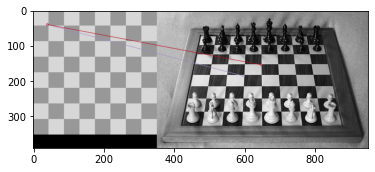

In [67]:
plt.imshow(chess_matches2)

# FLANN based matcher

In [68]:
sift = cv2.xfeatures2d.SIFT_create()

In [69]:
keypoint1, descrip1 = sift.detectAndCompute(chess, None)
keypoint2, descrip2 = sift.detectAndCompute(real_chess, None)

In [71]:
FLANN_INDEX_KDTREE = 0

index_params = {'algorithm':FLANN_INDEX_KDTREE, 'trees':5}

search_params = {'checks':50}

In [72]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [75]:
matches = flann.knnMatch(descrip1, descrip2, k=2)

In [76]:
len(matches)

200

In [81]:
chess_matches3 = cv2.drawMatches(chess, keypoint1, real_chess, keypoint2, matches[1], None, flags=0)

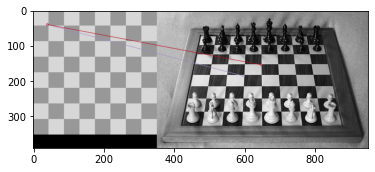

In [82]:
plt.imshow(chess_matches2)